In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [2]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.index.freq='MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

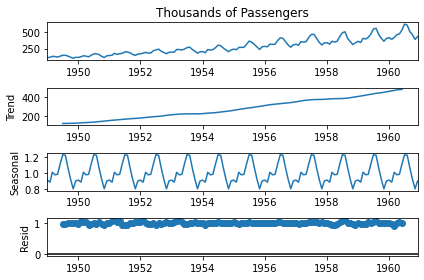

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose 

decomp = seasonal_decompose(df['Thousands of Passengers'],model='mul')
decomp.plot();

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

trend,cycle=hpfilter(x=df['Thousands of Passengers'],lamb=1600)

In [6]:
train_data=df.iloc[:113]
test_data=df.iloc[112:]


In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing



In [8]:
train_model=ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\anuj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\anuj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\anuj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [9]:
test_predictions=train_model.forecast(32)

In [10]:
test_predictions

1958-06-01    435.047949
1958-07-01    478.952742
1958-08-01    473.975241
1958-09-01    407.645224
1958-10-01    349.868124
1958-11-01    307.683313
1958-12-01    343.241494
1959-01-01    352.457454
1959-02-01    336.162638
1959-03-01    392.125072
1959-04-01    385.844718
1959-05-01    410.301120
1959-06-01    485.651388
1959-07-01    534.663052
1959-08-01    529.106583
1959-09-01    455.061263
1959-10-01    390.563707
1959-11-01    343.472089
1959-12-01    383.166288
1960-01-01    393.454220
1960-02-01    375.264042
1960-03-01    437.735854
1960-04-01    430.724989
1960-05-01    458.026084
1960-06-01    542.140863
1960-07-01    596.853413
1960-08-01    590.650632
1960-09-01    507.992589
1960-10-01    435.992876
1960-11-01    383.423706
1960-12-01    427.735012
1961-01-01    439.219604
Freq: MS, dtype: float64

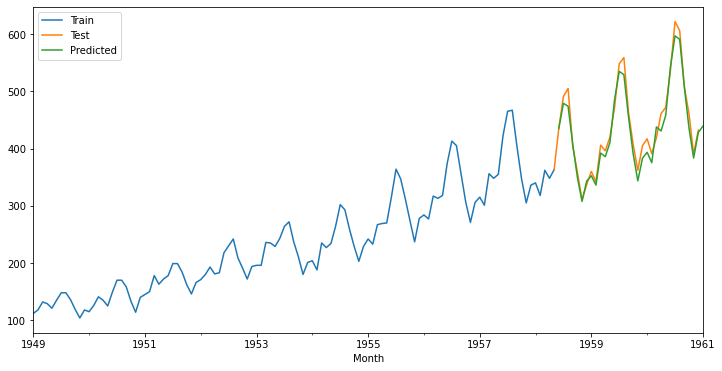

In [11]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,6));
test_data['Thousands of Passengers'].plot(legend=True,label='Test');
test_predictions.plot(legend=True,label='Predicted');

# Evaluation Metrics

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
mean_absolute_error(test_data,test_predictions)

45.994663936399675

In [14]:
(mean_squared_error(test_data,test_predictions))

2901.1307315223294

In [15]:
np.sqrt((mean_squared_error(test_data,test_predictions)))

53.86214562679739

In [16]:
test_data.describe()

,Thousands of Passengers
count,32.000000
mean,439.312500
std,77.370678
min,310.000000
25%,390.750000
50%,419.500000
75%,476.750000
max,622.000000


In [17]:
df2=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/samples.csv',index_col=0,parse_dates=True)

In [18]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


In [19]:
df2.index.freq='MS'
df2.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '1959-03-01', '1959-04-01', '1959-05-01', '1959-06-01',
               '1959-07-01', '1959-08-01', '1959-09-01', '1959-10-01',
               '1959-11-01', '1959-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')

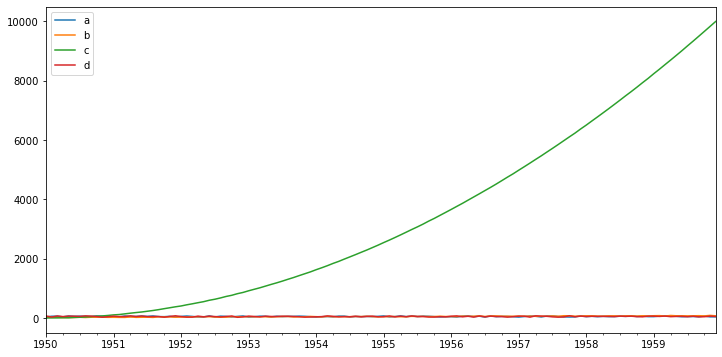

In [20]:
df2.plot(figsize=(12,6));

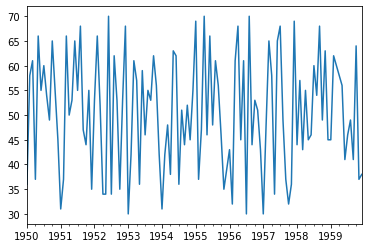

In [21]:
df2['a'].plot();

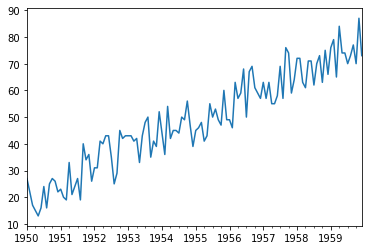

In [22]:
df2['b'].plot();

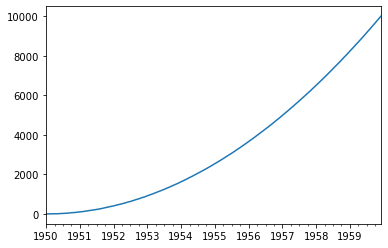

In [23]:
df2['c'].plot();

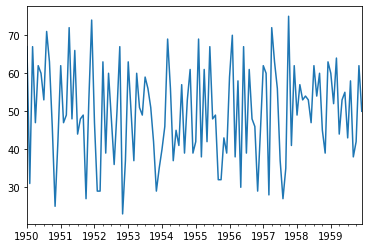

In [24]:
df2['d'].plot();

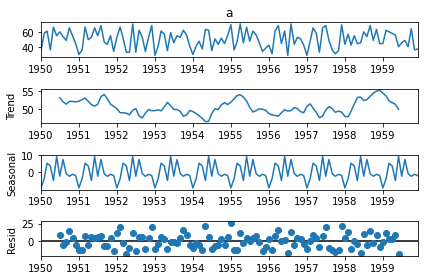

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_a=seasonal_decompose(df2['a'],model='add')
decomp_a.plot();

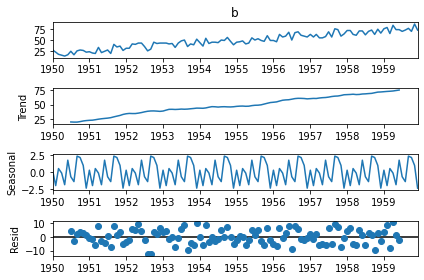

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_b=seasonal_decompose(df2['b'],model='add')
decomp_b.plot();

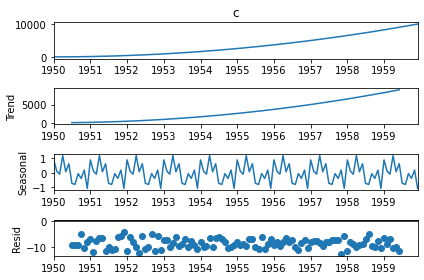

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_c=seasonal_decompose(df2['c'],model='add')
decomp_c.plot();

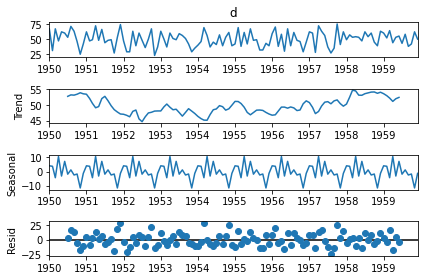

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_d=seasonal_decompose(df2['d'],model='add')
decomp_d.plot();

# Differencing(Converting Non-Stationery Data to Stationery)

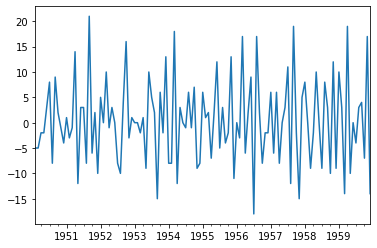

In [29]:
from statsmodels.tsa.statespace.tools import diff

diff(df2['b'],k_diff=1).plot();

# ACF & PACF

In [30]:
import statsmodels.api as sm

In [31]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [33]:
df1=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [34]:
df1.index.freq='MS'

In [40]:
df3=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [42]:
df3.index.freq='D'

In [43]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [44]:
df3.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


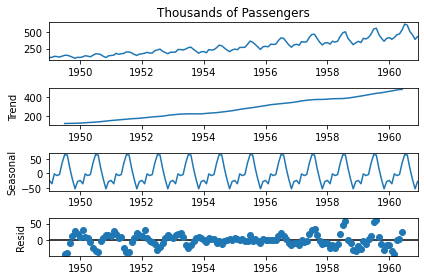

In [47]:
df1_decompose=seasonal_decompose(df1['Thousands of Passengers'],model='add')
df1_decompose.plot();

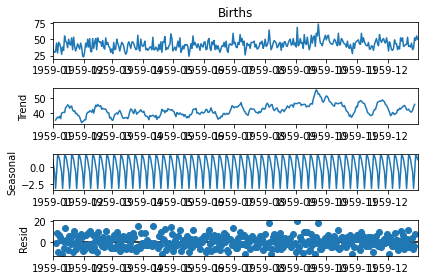

In [48]:
df3_decompose=seasonal_decompose(df3['Births'],model='add')
df3_decompose.plot();

In [56]:
df1_acf=acf(df1['Thousands of Passengers'],nlags=6)
df1_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 ])

In [58]:
pacf_yw(df1['Thousands of Passengers'],nlags=12,method='mle')

array([ 1.        ,  0.94804734, -0.22942187,  0.03814778,  0.09378544,
        0.0736067 ,  0.0077276 ,  0.12559713,  0.08995134,  0.23248854,
        0.16605126,  0.17127442, -0.1354311 ])

In [59]:
pacf_ols(df1['Thousands of Passengers'],nlags=12)

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285])

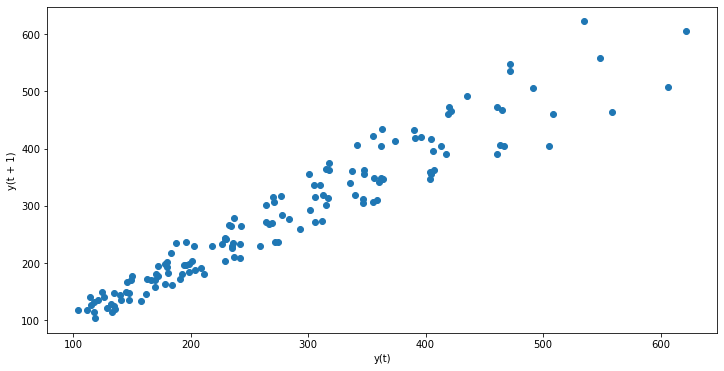

In [65]:
from pandas.plotting import lag_plot

from pylab import rcParams

rcParams['figure.figsize']=(12,6)

lag_plot(df1['Thousands of Passengers']);

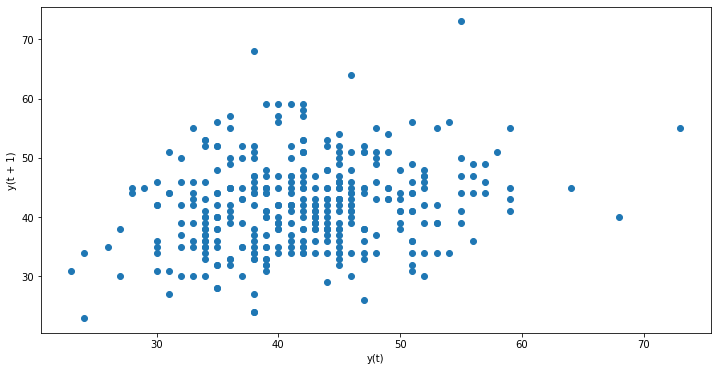

In [66]:
lag_plot(df3['Births']);

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

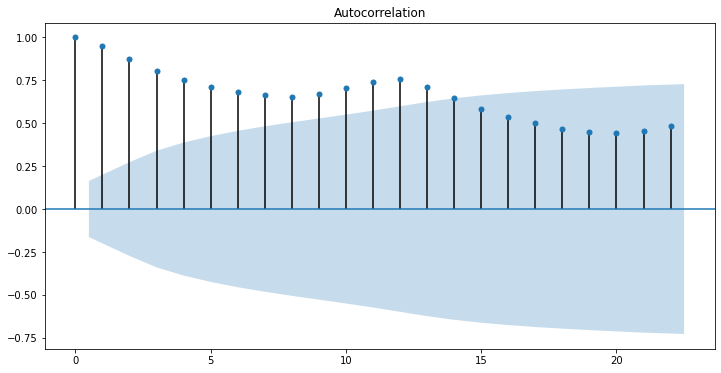

In [77]:
plot_acf(df1['Thousands of Passengers']);

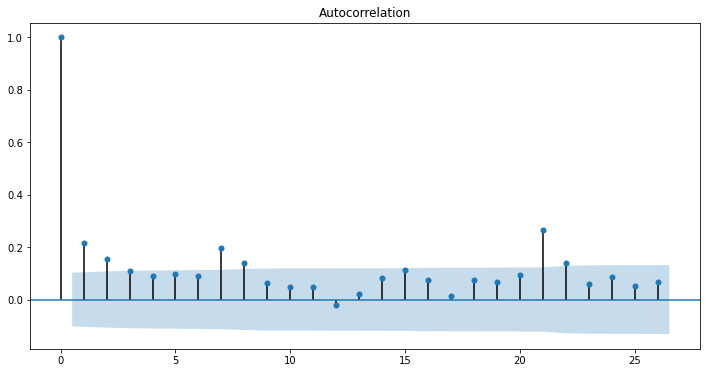

In [74]:
plot_acf(df3['Births']);

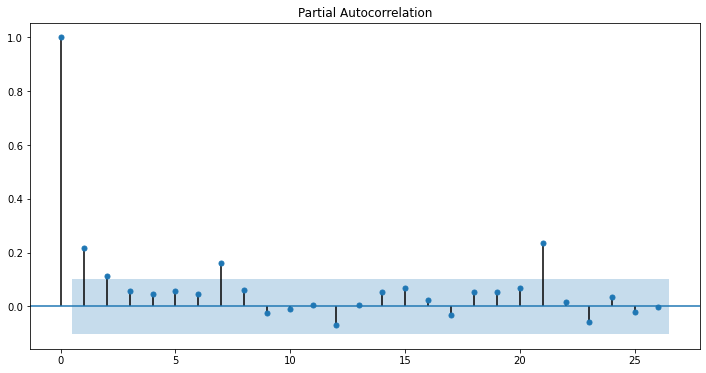

In [75]:
plot_pacf(df3['Births']);

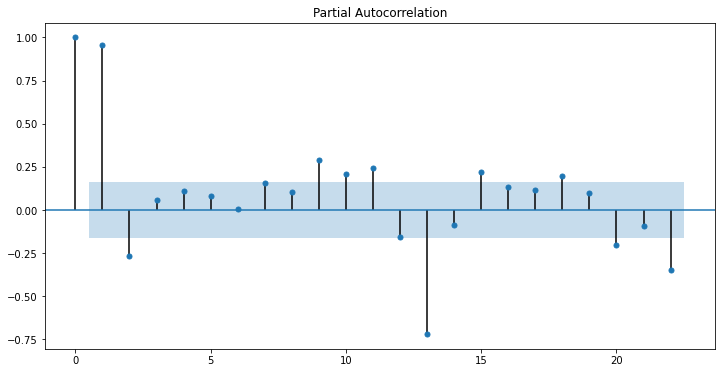

In [76]:
plot_pacf(df1['Thousands of Passengers']);